## Домашнее задание к занятию "Классификация: Логистическая регрессия и SVM".

***Цель:*** построить модели логистической регрессии и SVM, которые предсказывает уровень дохода человека; вывести качество полученных моделей на тестовой выборке, используя функцию score у модели.

***Данные к проекту:***  
Имеются данные adult.csv.
Целевой переменной является уровень дохода income (крайний правый столбец).

***План:***
1. Знакомство с данными: вывод данных, изучение их на наличие пропусков и правильность типов
2. Подготовка признаков: перекодирование, масштабирование, вычленение фичей и таргета, разделение на обучающую и тестовую выборки
4. Обучить модель логистической регрессии, посчитать score
5. Обучить на данных модель SVM, посчитать score
6. Написать вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Знакомство с данными

In [3]:
adults = pd.read_csv('adult.csv')
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
adults.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Пропусков у нас нет, и это хорошо. Касаемо типов данных: тут тоже всё в порядке.  
Что еще бросается в глаза: наличие столбцов с данными типа object. Их нужно будет перекодировать.  
Посмотрим на целевой признак (столбец adults['income']) и проверим, сколько у нас будет классов:

In [5]:
adults['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Всего 2 класса. Отлично.  

### Подготовка признаков

Идем дальше: вытащим из фрейма фичи.

In [6]:
features = adults.drop('income', axis=1)
print(features.shape)
features.head()

(48842, 14)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


Теперь перекодируем признаки типа object, применив метод прямого кодирования. При этом нам необходимо учитывать дамми-ловушку:

In [7]:
features = pd.get_dummies(features, drop_first=True)

In [8]:
features.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


100 колонок - сильно. Но мы не будем смотреть на приоритеты фичей. Оставим их все.

Идем дальше: нам осталось перекодировать таргет.

In [9]:
le = LabelEncoder()
le.fit(adults['income'])
target = pd.Series(data=le.transform(adults['income']))
target.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

Отмасштабируем данные, чтобы  модель не выбирала приоритетными признаки с бОльшими значениями:

In [10]:
features_scaler = pd.DataFrame(StandardScaler().fit_transform(features)).head()
features_scaler

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.995129,0.351675,-1.197259,-0.144804,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.663711,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
1,-0.046942,-0.945524,-0.419335,-0.144804,-0.217127,0.772930,-0.173795,-0.261940,-0.01431,0.663711,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
2,-0.776316,1.394723,0.747550,-0.144804,-0.217127,-0.034087,-0.173795,3.817672,-0.01431,-1.506680,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
3,0.390683,-0.277844,-0.030373,0.886874,-0.217127,-0.034087,-0.173795,-0.261940,-0.01431,0.663711,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
4,-1.505691,-0.815954,-0.030373,-0.144804,-0.217127,-0.841104,-0.173795,-0.261940,-0.01431,-1.506680,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705


Данные отмасштабированы. Теперь мы сможем при обучении моделей сравнить, на каких данных она обучится лучше: на отмасштабированных или на обычных.  
Осталось проверить баланс классов:

In [11]:
target.value_counts()

0    37155
1    11687
dtype: int64

<BarContainer object of 2 artists>

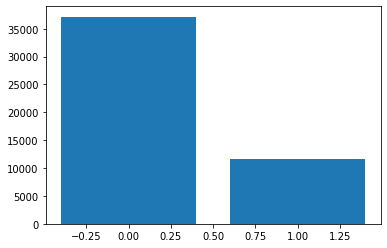

In [12]:
fig, ax = plt.subplots()
ax.bar(target.unique(), target.value_counts())

Налицо явный дисбаланс классов.  Насколько плохо это скажется на обучении - пока неизвестно.  
Теперь разделим данные на обучающую и тестовую выборки, учитывая при этом дисбаланс классов:

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

In [14]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(34189, 100)
(14653, 100)
(34189,)
(14653,)


### Обучение модели Logistic Regression:

Обучим модель и выведем score:

In [15]:
log_reg = LogisticRegression().fit(features_train, target_train)
log_reg_pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000)).fit(features_train, target_train) 
#сделаем пайплайн. По идее в таком случае не нужно было вводить новую переменную features_scaler, но пусть будет

Предсказываем таргет:

In [16]:
predict_log_reg = log_reg.predict(features_test)
predict_pipe = log_reg_pipe.predict(features_test)
print(predict_log_reg[:10])
print(predict_pipe[:10])

[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0]


И дополнительно мы можем предсказать вероятности попадания таргета в определенный класс:

In [17]:
predict_proba_log_reg = log_reg.predict_proba(features_test)
predict_proba_pipe = log_reg_pipe.predict_proba(features_test)
print(predict_proba_log_reg[:10])
print()
print(predict_proba_pipe[:10])

[[0.44706209 0.55293791]
 [0.74382042 0.25617958]
 [0.78392972 0.21607028]
 [0.78507344 0.21492656]
 [0.80663215 0.19336785]
 [0.85108277 0.14891723]
 [0.78434397 0.21565603]
 [0.78704207 0.21295793]
 [0.75105711 0.24894289]
 [0.86894717 0.13105283]]

[[0.48277199 0.51722801]
 [0.66139435 0.33860565]
 [0.98405895 0.01594105]
 [0.98741902 0.01258098]
 [0.99599429 0.00400571]
 [0.94045403 0.05954597]
 [0.37397926 0.62602074]
 [0.71219549 0.28780451]
 [0.96945404 0.03054596]
 [0.99757466 0.00242534]]


Теперь явно видно, почему тот или иной объект предсказан в конкретном классе. Например, первый объект, предсказанный на обычных данных, имеет вероятность принадлежности к классу "0" - 0.44706209, а к классу "1" - 0.55293791. Вердикт - класс 1.
Тем не менее, если брать тот же объект, но на нормализованных данных - он так же принадлежит к классу "1", но разница между вероятностями минимальна. Т.е. если бы мы, например, сдвинули порог в бОльшую сторону, то модель могла бы этот объект определить к классу "0".

Итак, мы видим, что предсказания на обычных данных и на отмасштабированных несколько отличаются. Кто окажется точнее - посмотрим, определив score:

In [18]:
print('Тренировочная выборка с первоначальными данными:', log_reg.score(features_train, target_train))
print('Тренировочная выборка с отмасштабированными данными:', log_reg_pipe.score(features_train, target_train))

Тренировочная выборка с первоначальными данными: 0.7978589604843663
Тренировочная выборка с отмасштабированными данными: 0.8525549153236421


In [19]:
print('Тестовая выборка с первоначальными данными:',log_reg.score(features_test, target_test))
print('Тестовая выборка с отмасштабированными данными:',log_reg_pipe.score(features_test, target_test))

Тестовая выборка с первоначальными данными: 0.7986077936258786
Тестовая выборка с отмасштабированными данными: 0.855592711390159


Таким образом, можно сказать, что модель, получившая на входе масштабированные данные, обучилась лучше и предсказывает точнее, чем модель, которую мы обучили на обычных данных.  
В любом случае, скор достаточно высок, соответственно, можно сделать вывод, что модель довольно прилично идентифицирует класс объекта.  
Также нельзя не заметить, что на тесте модель показывает чуть лучше результат, чем на тренировочной выборке. Это значит, что в тестовой выборке меньше шума, что тоже неплохо.

### Обучение модели SVM:

In [20]:
clf = SVC(gamma='auto')
clf_pipe = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(features_train, target_train)

In [21]:
clf.fit(features_train, target_train)
clf_pipe.fit(features_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Предсказываем:

In [22]:
predict_clf = clf.predict(features_test)
predict_clf_pipe = clf_pipe.predict(features_test)
print(predict_clf[:10])
print(predict_clf_pipe[:10])

[0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]


Теперь посмотрим, как обучилась модель SVM:

In [23]:
print('Тренировочная выборка с первоначальными данными:', clf.score(features_train, target_train))
print('Тренировочная выборка с отмасштабированными данными:', clf_pipe.score(features_train, target_train))

Тренировочная выборка с первоначальными данными: 0.9591389043259528
Тренировочная выборка с отмасштабированными данными: 0.8614466641317383


In [24]:
print('Тестовая выборка с первоначальными данными:', clf.score(features_test, target_test))
print('Тестовая выборка с отмасштабированными данными:', clf_pipe.score(features_test, target_test))

Тестовая выборка с первоначальными данными: 0.7565686207602539
Тестовая выборка с отмасштабированными данными: 0.8534771036647786


Посмотрим на score: показатель на тренировочных неотмасштабированных данных очень высокий. Результат можно было бы назвать прекрасным, если бы не score на тестовых данных. Такая разница обусловлена жестким переобучением модели.  
Что же насчет отмасштабированных данных? Тут о переобучении речи нет, а результат достаточно высок.  
В таком случае, и для метода опорных векторов в данной задаче выигрышнее оказались отмасштабированные данные.

## Выводы

Подводим итоги. Цель данной работы - построить модели логистической регрессии и SVM, которые предсказывает уровень дохода человека; вывести качество полученных моделей на тестовой выборке, используя функцию score у модели.  

В ходе работы было выполнено несколько шагов:
- Первым шагом было знакомство с данными, выявление пропусков (все ячейки были заполнены) и определение типов данных (которые также оказались верными).
- На втором шаге осуществлялась подготовка признаков: их перекодирование и масштабирование.
- Третьим шагом шло обучение модели логистической регрессии, в результате которого оказалось, что на отмасштабированных данных модель обучилась лучше и показала score выше, чем на изначальных данных.
- На четвертом шаге мы обучали модель SVM. В результате обучения выяснилось, что в данном случае модель также лучше работает с отмасштабированными данными.  

И несмотря на то, что показатели score практически одинаковы для обеих моделей, немного выше результат дает модель логистической регрессии. Тем не менее, об эффективности или неэффективности моделей говорить пока не стоит. Нам требуется больше данных и другие метрики качества, чтобы выявить "победителя". В любом случае, цель работы достигнута.